# Data Science Salaries Project

### Imports

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_curve
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

### Data Import and Analysis

In [2]:
data_df=pd.read_csv("/content/drive/MyDrive/ds_salaries.csv")

In [3]:
data_df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
data_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [5]:
for i in data_df.columns:
  print(data_df[i].unique())

[2020 2021 2022]
['MI' 'SE' 'EN' 'EX']
['FT' 'CT' 'PT' 'FL']
['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics Manager' 'Head of Data Sc

In [6]:
for i,j in data_df.dtypes.items():
  if j=='object':
    data_df[i] = pd.Categorical(data_df[i])
for i,j in data_df.dtypes.items():
  if j=='category':
    data_df[i] = data_df[i].cat.codes

In [7]:
data_df.describe()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607.000000,607.000000,6.070000e+02,607.000000,607.000000,607.000000,607.00000,607.000000,607.000000
mean,2021.405272,2.128501,1.993410,20.995058,3.240001e+05,13.029654,112297.869852,40.408567,70.92257,35.887974,0.810544
std,0.692133,1.034055,0.236774,10.541994,1.544357e+06,4.378063,70957.259411,18.273621,40.70913,16.031857,0.654021
min,2020.000000,0.000000,0.000000,0.000000,4.000000e+03,0.000000,2859.000000,0.000000,0.00000,0.000000,0.000000
25%,2021.000000,2.000000,2.000000,13.000000,7.000000e+04,8.000000,62726.000000,20.000000,50.00000,18.000000,0.000000
50%,2022.000000,2.000000,2.000000,17.000000,1.150000e+05,16.000000,101570.000000,55.000000,100.00000,48.000000,1.000000
75%,2022.000000,3.000000,2.000000,22.000000,1.650000e+05,16.000000,150000.000000,55.000000,100.00000,48.000000,1.000000
max,2022.000000,3.000000,3.000000,49.000000,3.040000e+07,16.000000,600000.000000,56.000000,100.00000,49.000000,2.000000


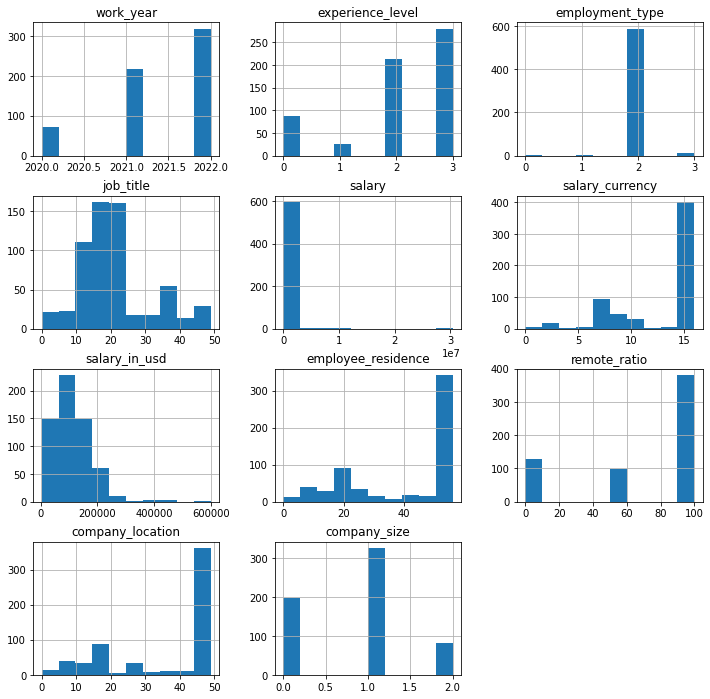

In [8]:
data_df.hist(figsize=(12,12));

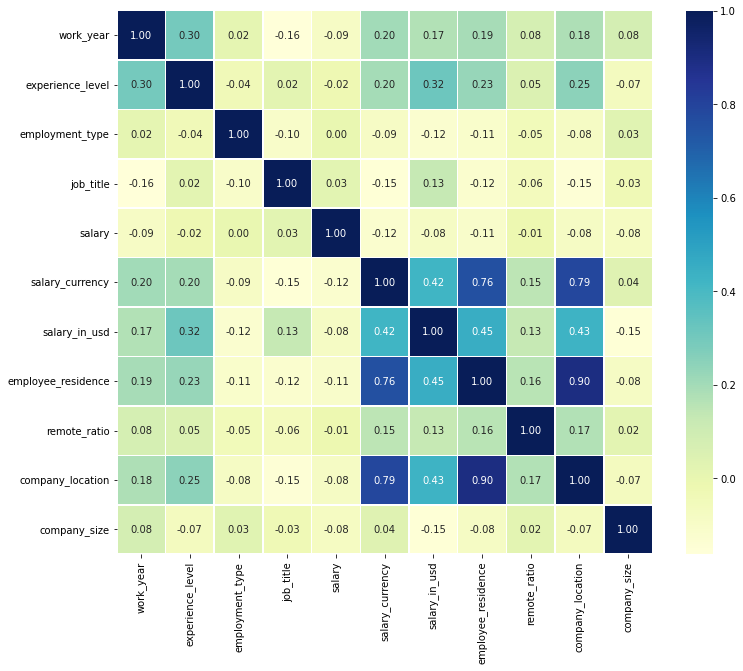

In [9]:
corr_matrix=data_df.corr()
fig,ax=plt.subplots(figsize=(12,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

### Clustering Algorithm

In [10]:
data_arr=[]
col_names=data_df.columns
for cols in col_names:
    arrs=[]
    for i in data_df[cols]:
        arrs.append(i)
    data_arr.append(arrs)

In [11]:
temp_data=[]
for i in range(len(data_arr[0])):
    arr=[]
    for ii in range(len(data_arr)):
        arr.append(data_arr[ii][i])
    temp_data.append(arr)

In [12]:
data_arr=temp_data
temp_data=np.array([np.array(xi) for xi in data_arr])
data_arr=temp_data

#### Clustering 1

In [13]:
clustering_1=MeanShift().fit(data_arr)

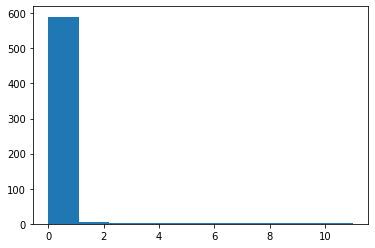

In [14]:
plt.hist(clustering_1.labels_);

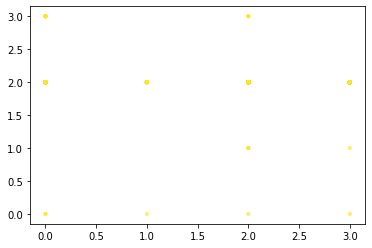

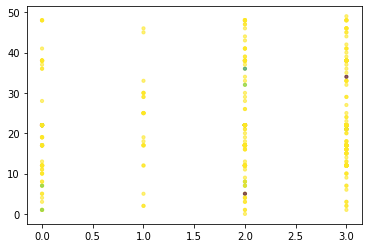

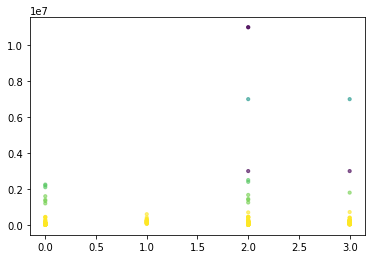

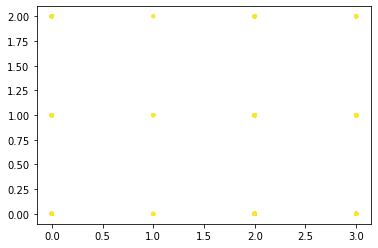

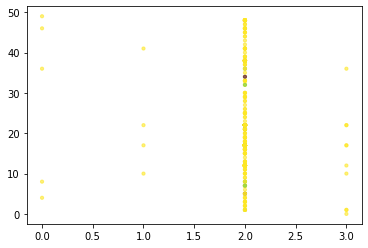

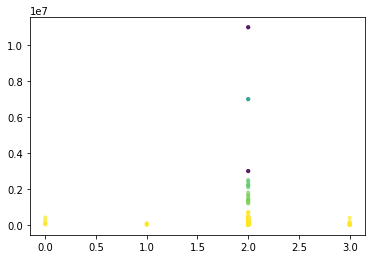

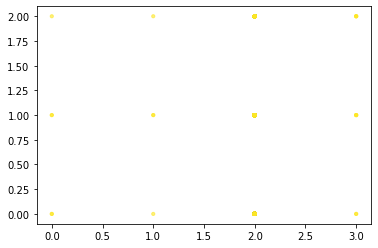

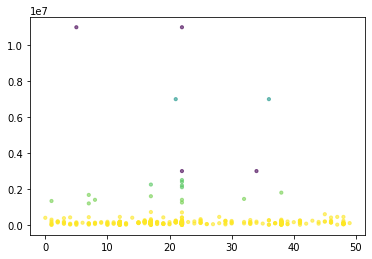

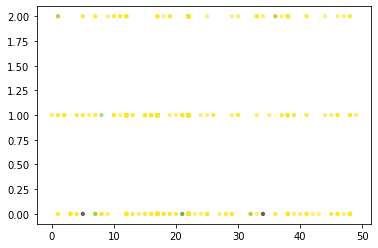

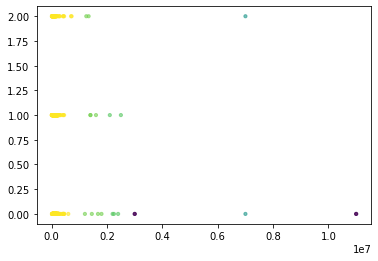

In [15]:
df=data_df
df['cluster']=clustering_1.labels_
centroids = clustering_1.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4], 5:cen_x[5]})
df['cen_y'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4], 5:cen_x[5]})
# define and map colors
#colors = ['#81DF20', '#2095DF','#0000FF','#458B74','#E3CF57','#DF2020',]
df['c'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4], 5:cen_x[5]})
axis=['experience_level','employment_type','job_title','salary','company_size']
for i in range(len(axis)):
  for ii in range(i,len(axis)):
    if i!=ii:
      plt.scatter(df[axis[i]], df[axis[ii]], c=df.c, alpha = 0.6, s=10);
      plt.title='Clustering Plot '+str(i)+'/'+str(ii)
      plt.xlabel=axis[i]
      plt.ylabel=axis[ii]
      plt.show();

#### Clustering 2

In [16]:
clustering_2=KMeans(n_clusters=30,n_init=100,max_iter=500).fit(data_arr)

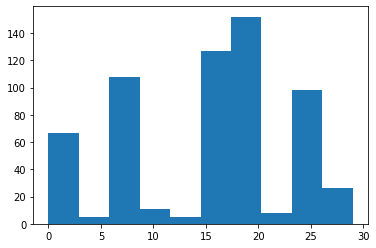

In [17]:
plt.hist(clustering_2.labels_);

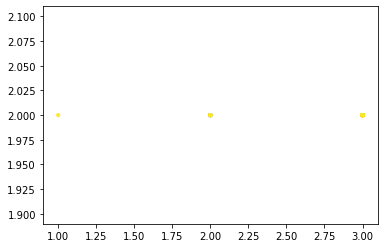

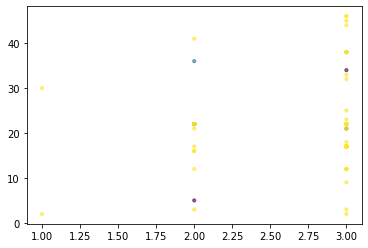

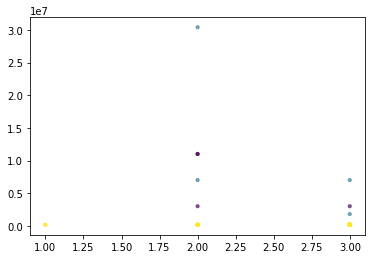

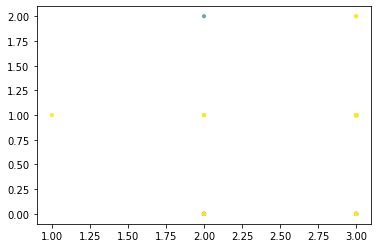

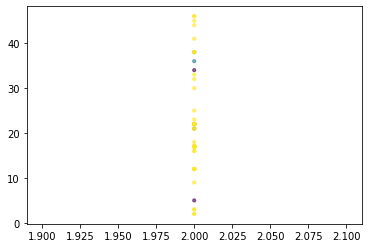

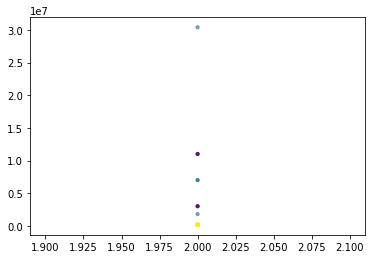

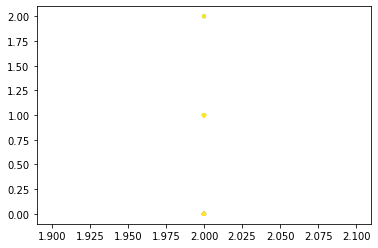

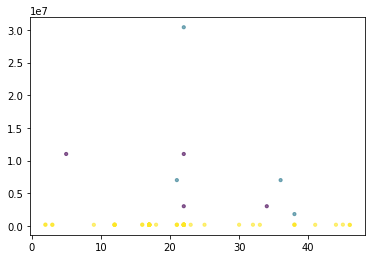

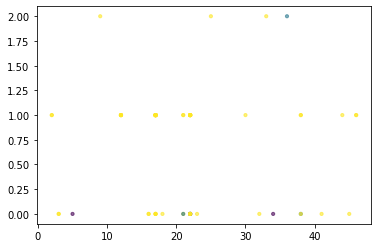

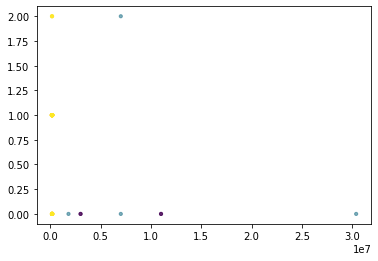

In [18]:
df=data_df
df['cluster']=clustering_2.labels_
centroids = clustering_2.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4], 5:cen_x[5]})
df['cen_y'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4], 5:cen_x[5]})
# define and map colors
#colors = ['#81DF20', '#2095DF','#0000FF','#458B74','#E3CF57','#DF2020',]
df['c'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4], 5:cen_x[5]})
axis=['experience_level','employment_type','job_title','salary','company_size']
for i in range(len(axis)):
  for ii in range(i,len(axis)):
    if i!=ii:
      plt.scatter(df[axis[i]], df[axis[ii]], c=df.c, alpha = 0.6, s=10);
      plt.title='Clustering Plot '+str(i)+'/'+str(ii)
      plt.xlabel=axis[i]
      plt.ylabel=axis[ii]
      plt.show();

### Predicting Salary Based (Regression)

In [19]:
data_df.drop("salary",axis=1,inplace=True)
data_df.drop('cen_x',axis=1,inplace=True)
data_df.drop('cen_y',axis=1,inplace=True)
data_df.drop('c',axis=1,inplace=True)
data_df.drop('cluster',axis=1,inplace=True)

In [20]:
data_df

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,22,7,79833,14,0,12,0
1,2020,3,2,41,16,260000,32,0,29,2
2,2020,3,2,7,8,109024,20,50,18,1
3,2020,2,2,47,16,20000,23,0,20,2
4,2020,3,2,38,16,150000,55,50,48,0
...,...,...,...,...,...,...,...,...,...,...
602,2022,3,2,17,16,154000,55,100,48,1
603,2022,3,2,17,16,126000,55,100,48,1
604,2022,3,2,12,16,129000,55,0,48,1
605,2022,3,2,12,16,150000,55,100,48,1


#### Scikit Learn built in functions

In [21]:
X=data_df.drop("salary_in_usd",axis=1)
y=data_df["salary_in_usd"]

In [24]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [27]:
models_dict={"Lasso" : Lasso(),
             "ElasticNet" : ElasticNet(),
             "Ridge" : Ridge(),
             "SVR_linear" : SVR(kernel="linear"),
             "SVR_rbf" : SVR(kernel="rbf"),
             "RandomForestRegressor" : RandomForestRegressor()}

In [34]:
def fit_and_score_models(models,X_train,y_train,X_test,y_test):
    """
    Fits and evaluates a machine learning model using sklearn's .fit() and .score() functions.
    models=dictionary of model names and model functions(according to sklearn's standard nomenclature)
    X_train=Pandas DataFrame used for fitting the model(given variables)
    y_train=Pandas DataFrame used for fitting the model(target)
    X_test=Pandas DataFrame used for evaluating the model
    y_test=Pandas DataFrame used for evaluating the model
    """
    results={}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_preds=model.predict(X_test)
        results[model_name] = mean_absolute_error(y_test, y_preds)
    return results

In [36]:
results=fit_and_score_models(models_dict,X_train,y_train,X_test,y_test)
results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1],reverse=0)}
print("3 Most Promising Models:\n",list(results.items())[0],"\n",list(results.items())[1],"\n",list(results.items())[2])

3 Most Promising Models:
 ('RandomForestRegressor', 27804.014600347087) 
 ('Lasso', 35248.11356976482) 
 ('Ridge', 35261.80441434434)


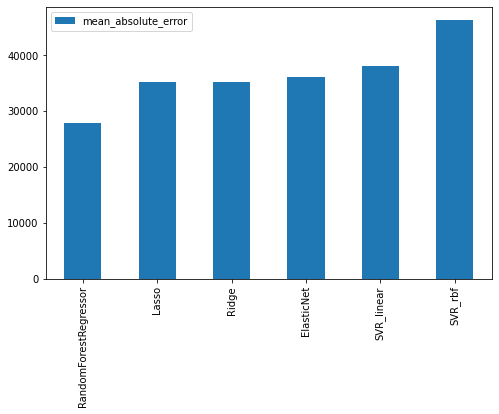

In [37]:
results_df=pd.DataFrame.from_dict(results, orient='index',columns=['mean_absolute_error'])
results_df.plot.bar(figsize=(8,5));

##### Feature Importances for Random Forest Regressor

In [38]:
model=RandomForestRegressor()
model.fit(X_train, y_train)
features=model.feature_importances_
keys=X_test.columns
features_dict={}
features_dict = {keys[i]:features[i] for i in range(len(keys))}

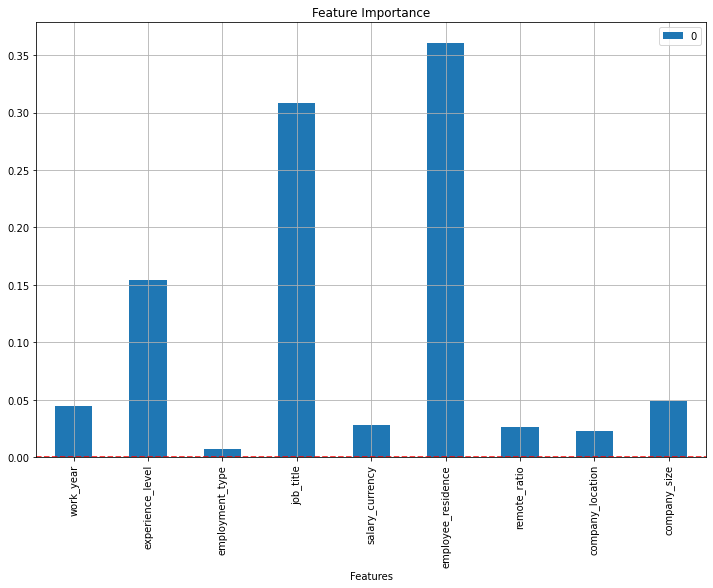

In [39]:
results_df=pd.DataFrame.from_dict(features_dict, orient='index')
ax=results_df.plot.bar(figsize=(12,8));
ax.axhline(y=0,linestyle="--",color='r');
ax.grid();
ax.set(title="Feature Importance",xlabel="Features");

#### Neural Network Model

In [44]:
for i in X.columns:
  max_val=-1
  for ii in X[i]:
    if max_val<ii:
      max_val=ii
  temp=[]
  for ii in X[i]:
    temp.append(float(ii)/float(max_val))
  X[i]=temp

In [47]:
max_salary=-1
for i,j in y.items():
  if max_salary<j:
    max_salary=j
temp=[]
for i,j in y.items():
  temp.append(float(j)/float(max_salary))

In [49]:
y_temp=pd.DataFrame()
y_temp["salary_usd"]=temp
y=y_temp

In [51]:
y=y["salary_usd"]

In [54]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [63]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
data_model=tf.keras.Sequential([
    tf.keras.layers.Dense(9),
    tf.keras.layers.Dense(13,activation="relu"),
    tf.keras.layers.Dense(1)])
data_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
history=data_model.fit(X_train,y_train,epochs=150,callbacks=[callback],validation_data=[X_test,y_test])

Epoch 1/150
16/16 [==============================] - 1s 12ms/step - loss: 0.1880 - mae: 0.1880 - val_loss: 0.1261 - val_mae: 0.1261
Epoch 2/150
16/16 [==============================] - 0s 4ms/step - loss: 0.1242 - mae: 0.1242 - val_loss: 0.0892 - val_mae: 0.0892
Epoch 3/150
16/16 [==============================] - 0s 3ms/step - loss: 0.0972 - mae: 0.0972 - val_loss: 0.0768 - val_mae: 0.0768
Epoch 4/150
16/16 [==============================] - 0s 3ms/step - loss: 0.0861 - mae: 0.0861 - val_loss: 0.0678 - val_mae: 0.0678
Epoch 5/150
16/16 [==============================] - 0s 3ms/step - loss: 0.0820 - mae: 0.0820 - val_loss: 0.0653 - val_mae: 0.0653
Epoch 6/150
16/16 [==============================] - 0s 4ms/step - loss: 0.0794 - mae: 0.0794 - val_loss: 0.0622 - val_mae: 0.0622
Epoch 7/150
16/16 [==============================] - 0s 4ms/step - loss: 0.0778 - mae: 0.0778 - val_loss: 0.0622 - val_mae: 0.0622
Epoch 8/150
16/16 [==============================] - 0s 3ms/step - loss: 0.0781 - 

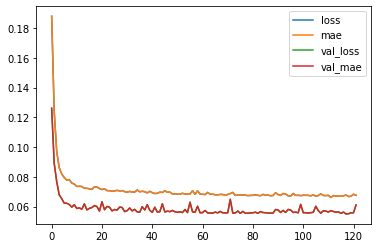

In [67]:
pd.DataFrame(history.history).plot();